# Case study on unsupervised learning
Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it

# KMEANS CLUSTERING without PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
data=pd.read_csv("Wine_clust.csv")

In [4]:
#Do exploratory data analysis
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
#find the number of clusters k

In [9]:
feature_set=data.iloc[:,2:4].values

In [10]:
feature_set

array([[ 2.43, 15.6 ],
       [ 2.14, 11.2 ],
       [ 2.67, 18.6 ],
       [ 2.5 , 16.8 ],
       [ 2.87, 21.  ],
       [ 2.45, 15.2 ],
       [ 2.45, 14.6 ],
       [ 2.61, 17.6 ],
       [ 2.17, 14.  ],
       [ 2.27, 16.  ],
       [ 2.3 , 18.  ],
       [ 2.32, 16.8 ],
       [ 2.41, 16.  ],
       [ 2.39, 11.4 ],
       [ 2.38, 12.  ],
       [ 2.7 , 17.2 ],
       [ 2.72, 20.  ],
       [ 2.62, 20.  ],
       [ 2.48, 16.5 ],
       [ 2.56, 15.2 ],
       [ 2.28, 16.  ],
       [ 2.65, 18.6 ],
       [ 2.36, 16.6 ],
       [ 2.52, 17.8 ],
       [ 2.61, 20.  ],
       [ 3.22, 25.  ],
       [ 2.62, 16.1 ],
       [ 2.14, 17.  ],
       [ 2.8 , 19.4 ],
       [ 2.21, 16.  ],
       [ 2.7 , 22.5 ],
       [ 2.36, 19.1 ],
       [ 2.36, 17.2 ],
       [ 2.7 , 19.5 ],
       [ 2.65, 19.  ],
       [ 2.41, 20.5 ],
       [ 2.84, 15.5 ],
       [ 2.55, 18.  ],
       [ 2.1 , 15.5 ],
       [ 2.51, 13.2 ],
       [ 2.31, 16.2 ],
       [ 2.12, 18.8 ],
       [ 2.59, 15.  ],
       [ 2.

In [11]:
#Elbow method: find optimal value of k

In [12]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
    km.fit(feature_set)
    wcss.append(km.inertia_)

C:\Users\Reshma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
wcss

[1987.34728988764,
 787.3269211868686,
 419.91348895348847,
 271.73241508354835,
 171.18258639231306,
 121.64523370111536,
 88.99238303713383,
 68.48332320381232,
 57.03858872153392,
 47.81473846609041]

# Elbow Method

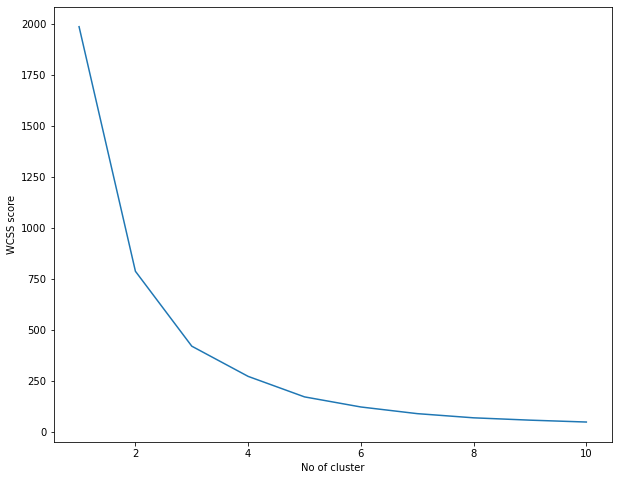

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.xlabel("No of cluster")
plt.ylabel("WCSS score")
plt.show()

# Elbow found at k=5 and k=3. Hence lets build both models and compare silhouette score to find the optimal value of k

In [16]:
#Build model with k=5

In [17]:
km=KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=101)
km.fit(feature_set)

KMeans(n_clusters=5, random_state=101)

In [18]:
data['km_cluster']=km.labels_

In [19]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,3
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


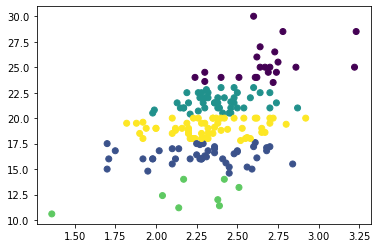

In [20]:
#Visualise clustering output
plt.scatter(data["Ash"],data["Ash_Alcanity"],c=data["km_cluster"])
plt.show()

In [21]:
#To check how clusters are formed for k varying from 3 to 7

In [26]:
for i in range(3,8):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    km.fit(feature_set)
    data[f'km_{i}']=km.labels_
    y_km=km.fit_predict(feature_set)
    print(y_km)

[2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 0 2 0 0 1 2 2 0 2 1 0 2 0 0 0 2
 0 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 2 0 2 2 0 1 1 1
 0 2 2 0 2 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 2 0 0 2 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 2 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 2 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1]
[2 2 0 2 3 2 2 0 2 2 0 2 2 2 2 2 0 0 2 2 2 0 2 0 0 1 2 2 0 2 3 0 2 0 0 3 2
 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 3 2 2 2 2 2 2 0 0 0 0 2 0 2 2 3 1 1 1
 3 2 2 0 2 3 0 0 1 3 0 0 3 1 3 1 0 3 3 0 0 0 3 2 0 0 0 0 3 0 3 3 0 3 0 0 0
 3 0 3 3 3 3 3 2 0 0 1 1 3 3 3 3 1 1 3 0 0 1 3 0 0 3 1 0 1 3 0 1 0 0 3 0 3
 3 3 1 3 1 0 0 3 0 1 1 3 3 0 3 0 3 3 3 0 1 1 0 0 0 3 3 0 0 1]
[1 3 4 1 2 1 1 1 3 1 4 1 1 3 3 1 4 4 1 1 1 4 1 4 4 0 1 1 4 1 2 4 1 4 4 2 1
 4 1 3 1 4 1 1 1 4 1 1 4 1 3 1 3 1 1 2 1 1 1 3 1 1 4 4 4 4 1 4 1 1 2 0 0 0
 2 1 1 4 1 2 4 4 0 2 4 4 2 0 2 0 4 2 2 4 4 4 2 1 4 4 1 4 2 4 2 2 4 2 4 4 4
 2 4 2 2 2 2 2 1 4 4 0 0 2 2 2 2 0 0 2 4 4 0 2 1 4 

In [23]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_cluster,km_3,km_4,km_5,km_6,km_7
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,2,1,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3,2,2,3,5,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4,0,0,4,3,6
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,2,1,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0,3,2,0,2


In [ ]:
#Build model with k=3

In [31]:
km1=KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=101)
y_km1=km1.fit_predict(feature_set)
print(y_km1)
     

[2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 0 2 0 0 1 2 2 0 2 1 0 2 0 0 0 2
 0 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 2 0 2 2 0 1 1 1
 0 2 2 0 2 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 2 0 0 2 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 2 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 2 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1]


# Silhouette_score

In [32]:
#when k=5
from sklearn.metrics import silhouette_score

In [29]:
sc=silhouette_score(feature_set,y_km)
sc

0.5140993538670603

In [34]:
#when k=3
sc=silhouette_score(feature_set,y_km1)
sc

0.5138416314468206

In [35]:
#Plot different clusters

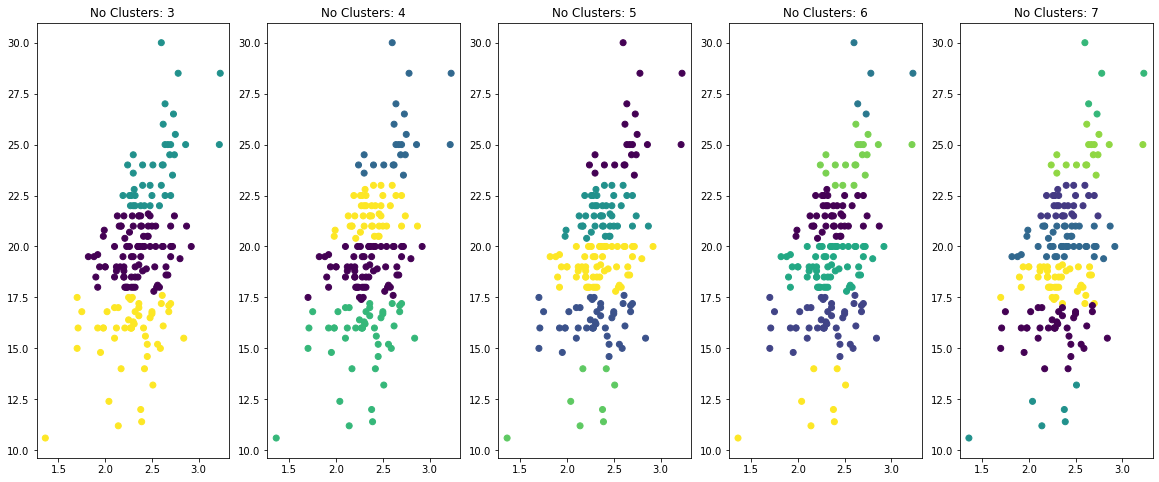

In [36]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,8))

for i,ax in enumerate(fig.axes, start=3):
    ax.scatter(data["Ash"],data["Ash_Alcanity"],c=data[f'km_{i}'])
    ax.set_title(f'No Clusters: {i}')
                            
     

# Hence its clear from the graph and silhouette score that best clustering is made when optimal value of k is taken as 5

# KMEANS CLUSTERING WITH PCA

In [37]:
#Pca is used for feature reduction

In [38]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_cluster,km_3,km_4,km_5,km_6,km_7
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,2,1,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3,2,2,3,5,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4,0,0,4,3,6
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,2,1,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0,3,2,0,2


In [39]:
data.shape

(178, 19)

In [40]:
#since there are 19 columns, its best to reduce the number of features to get optimal clusters

In [ ]:
#step 1 for PCA: standardisation

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data.loc[:,:]=sc.fit_transform(data)

In [43]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_cluster,km_3,km_4,km_5,km_6,km_7
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.844085,1.385651,0.487088,-0.844085,-0.630577,-1.201459
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0.547092,1.385651,0.487088,0.547092,1.964630,0.102564
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.242681,-0.941197,-1.164373,1.242681,0.667026,1.406586
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-0.844085,1.385651,0.487088,-0.844085,-0.630577,-1.201459
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-0.148496,-0.941197,1.312819,-0.148496,-1.279378,-0.332111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-0.148496,-0.941197,1.312819,-0.148496,-1.279378,-0.332111
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-0.148496,0.222227,1.312819,-0.148496,1.315828,-0.766785
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.242681,-0.941197,-1.164373,1.242681,0.667026,-0.332111
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.242681,-0.941197,-1.164373,1.242681,0.667026,-0.332111


In [46]:
#PCA import
from sklearn.decomposition import PCA
pca1=PCA(n_components=2)
y_pca1=pca1.fit_transform(data)
y_pca1.shape

(178, 2)

In [47]:
pca1.components_

array([[-0.17228561,  0.22775138, -0.01068083,  0.226896  , -0.14629935,
        -0.37659671, -0.39822462,  0.26981495, -0.28562427,  0.0548743 ,
        -0.26556287, -0.34578359, -0.29071207,  0.11564072, -0.26503316,
        -0.06415603,  0.11564072,  0.03343135,  0.10402859],
       [-0.11769742, -0.10943106, -0.12283101, -0.13281991, -0.03371596,
         0.06552404,  0.09858802, -0.13058289,  0.10266283, -0.16093101,
         0.16912277,  0.12621687, -0.02032124,  0.44215231, -0.29048553,
        -0.4016615 ,  0.44215231,  0.29401203,  0.32357858]])

In [48]:
#Build Kmeans model with new feature set as y_pca1

In [53]:
feature_set1=pd.DataFrame(y_pca1,columns=["PCA1","PCA2"])

In [54]:
type(feature_set1)

pandas.core.frame.DataFrame

In [55]:
km2=KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=101)
y_km2=km2.fit_predict(feature_set1)
print(y_km2)

[3 3 0 3 1 3 3 3 3 3 0 3 3 3 3 3 0 0 3 3 3 0 3 0 0 1 3 3 0 3 3 0 3 0 0 3 3
 0 3 3 3 0 3 1 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 0 2 2 0 0 0 0 3 0 1 3 2 3 1 3
 3 1 1 4 3 1 0 0 1 2 0 0 1 1 1 1 4 2 2 0 0 0 1 3 0 0 1 0 1 0 1 2 0 2 0 0 0
 1 4 1 1 1 1 1 2 0 0 3 1 1 1 1 1 2 1 2 4 4 2 2 2 4 2 2 4 2 2 4 2 4 4 2 4 2
 2 2 2 2 2 4 4 2 4 2 1 2 2 4 2 4 2 2 2 4 2 2 4 4 4 2 2 4 4 2]


In [57]:
sc2=silhouette_score(feature_set1,y_km2)
sc2

0.5360500307117543

# We got highest silhouette score after doing Principle Component Analysis with k=5

# AGGLOMERATIVE CLUSTERING

In [59]:
import scipy.cluster.hierarchy as sc

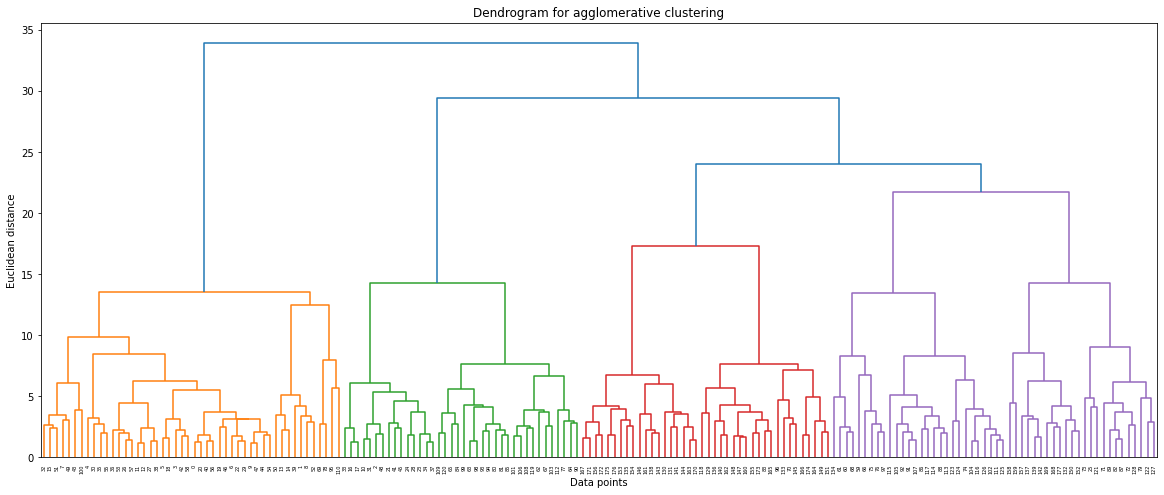

In [66]:
plt.figure(figsize=(20,8))
dendrogram=sc.dendrogram(sc.linkage(data, method='ward'),labels = data.index,leaf_rotation=90)
plt.title("Dendrogram for agglomerative clustering")
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

In [68]:
#From dendrogram its clearly visible that the largest vertical line that is not being cut by any horzintal line intersects at 3 points. 
#Hence the optimal number of clusters is 3

In [70]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ac=ac.fit_predict(data)
print(y_ac)

[1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 2 0 1 1 2 1 1 2 1 2 2 1 1
 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 2 0 2 0 1 0 0 0 0
 0 0 0 2 1 0 2 2 0 0 2 2 0 0 0 0 2 0 0 2 2 1 0 0 2 2 1 2 0 2 0 0 2 0 2 2 1
 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
sc3=silhouette_score(data,y_ac)
print(sc3)

0.19121005820472256


# Agglomerative clustering with PCA

In [73]:
pca2=PCA(n_components=2)
y_ac1=pca2.fit_transform(data)
print(y_ac1)


[[-3.93774209 -1.37334047]
 [-2.27246374  1.35167631]
 [-1.61596864  2.90114376]
 [-4.42672398 -1.68288436]
 [-0.9306367  -0.95771496]
 [-3.73918614 -1.65560965]
 [-3.12221469 -1.53264434]
 [-2.4013937  -0.34464975]
 [-2.76901183  0.58776981]
 [-3.38437979 -1.34476917]
 [-2.5612093   3.13254629]
 [-2.44427863 -1.56029086]
 [-2.77756079 -1.48402558]
 [-3.52983192  1.21942537]
 [-4.36562412  1.24347925]
 [-2.73619844 -0.92023125]
 [-1.5738177   1.79482559]
 [-1.28972435  1.88925379]
 [-4.22746276 -1.65786869]
 [-2.74131223 -1.55889015]
 [-3.72269291 -1.22979608]
 [-0.22303313  2.75135316]
 [-3.1298616  -1.19831227]
 [-0.7415647   3.07323094]
 [-1.04456024  2.40458457]
 [-1.21687061 -0.85255664]
 [-2.46078192 -1.66649366]
 [-1.91303619 -1.48973383]
 [-1.50581832  2.20638255]
 [-2.88424615 -1.2978235 ]
 [-2.71383176 -1.12094662]
 [-1.81823909  2.83362386]
 [-2.01693865 -0.63663217]
 [-1.30389312  1.85247759]
 [-0.58698793  2.64886014]
 [-1.74712898 -0.45471372]
 [-2.0845023  -1.73898694]
 

In [74]:
pca2.components_

array([[-0.17228561,  0.22775138, -0.01068083,  0.226896  , -0.14629935,
        -0.37659671, -0.39822462,  0.26981495, -0.28562427,  0.0548743 ,
        -0.26556287, -0.34578359, -0.29071207,  0.11564072, -0.26503316,
        -0.06415603,  0.11564072,  0.03343135,  0.10402859],
       [-0.11769742, -0.10943106, -0.12283101, -0.13281991, -0.03371596,
         0.06552404,  0.09858802, -0.13058289,  0.10266283, -0.16093101,
         0.16912277,  0.12621687, -0.02032124,  0.44215231, -0.29048553,
        -0.4016615 ,  0.44215231,  0.29401203,  0.32357858]])

In [84]:
#convert to dataframe
ac_data=pd.DataFrame(y_ac1,columns=["PC1","PC2"])

In [85]:
#Build model with pca2

In [86]:
ac2=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ac2=ac2.fit_predict(ac_data)
print(y_ac2)

[1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 2 2 1 1
 2 1 1 1 2 1 0 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 2 2 1 2 0 1 0 1 0 1
 1 0 1 2 1 0 2 2 0 0 2 2 0 0 0 0 2 0 0 2 2 2 0 1 2 2 0 2 0 2 0 0 2 0 2 2 2
 0 2 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [87]:
#calculate silhouette score
sc4=silhouette_score(ac_data,y_ac2)
print(sc4)

0.522070789966315


# For agglomerative clustering ,optimal value of cluster is 3 and highest silhouette score is obtained with principle component analysis

In [88]:
from sklearn.cluster import DBSCAN

In [111]:
db=DBSCAN(eps=5,min_samples=4)

In [112]:
model=db.fit(data)

In [113]:
label=model.labels_

In [114]:
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [115]:
y=db.fit_predict(data)

In [118]:
sc5=silhouette_score(data,y)
sc5

0.2060169739827462

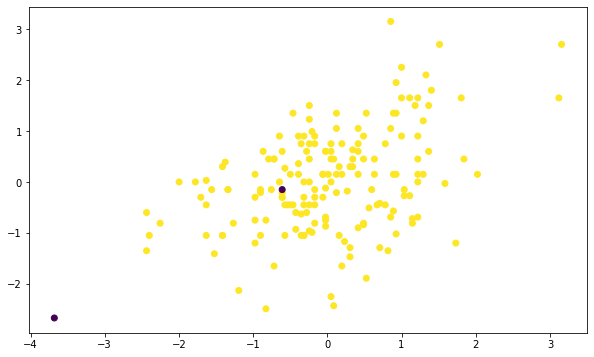

In [119]:
plt.figure(figsize=(10,6))
plt.scatter(data["Ash"],data["Ash_Alcanity"],c=label)

# DBSCAN with PCA

In [150]:
pca3=PCA(n_components=3)
y_db=pca3.fit_transform(data)
y_db

array([[-3.93774209, -1.37334047, -0.86115727],
       [-2.27246374,  1.35167631, -0.3201306 ],
       [-1.61596864,  2.90114376, -1.63770898],
       [-4.42672398, -1.68288436, -2.03682018],
       [-0.9306367 , -0.95771496, -0.05360815],
       [-3.73918614, -1.65560965, -1.50579834],
       [-3.12221469, -1.53264434, -0.63687336],
       [-2.4013937 , -0.34464975, -1.53679789],
       [-2.76901183,  0.58776981, -1.35683169],
       [-3.38437979, -1.34476917, -0.2689098 ],
       [-2.5612093 ,  3.13254629, -1.96137633],
       [-2.44427863, -1.56029086, -0.14379978],
       [-2.77756079, -1.48402558, -0.17670134],
       [-3.52983192,  1.21942537, -1.64131355],
       [-4.36562412,  1.24347925, -2.54648765],
       [-2.73619844, -0.92023125, -1.27395038],
       [-1.5738177 ,  1.79482559, -2.72345258],
       [-1.28972435,  1.88925379, -2.0724084 ],
       [-4.22746276, -1.65786869, -1.86719171],
       [-2.74131223, -1.55889015, -0.51611158],
       [-3.72269291, -1.22979608, -0.263

In [151]:
pca3.components_

array([[-0.17228561,  0.22775138, -0.01068083,  0.226896  , -0.14629935,
        -0.37659671, -0.39822462,  0.26981495, -0.28562427,  0.0548743 ,
        -0.26556287, -0.34578359, -0.29071207,  0.11564072, -0.26503316,
        -0.06415603,  0.11564072,  0.03343135,  0.10402859],
       [-0.11769742, -0.10943106, -0.12283101, -0.13281991, -0.03371596,
         0.06552404,  0.09858802, -0.13058289,  0.10266283, -0.16093101,
         0.16912277,  0.12621687, -0.02032124,  0.44215231, -0.29048553,
        -0.4016615 ,  0.44215231,  0.29401203,  0.32357858],
       [-0.45473154, -0.20613824, -0.2686283 ,  0.0554128 , -0.28495895,
        -0.04185673,  0.02179091, -0.0117316 , -0.03361162, -0.5051314 ,
         0.24602176,  0.17558721, -0.34079216, -0.09681574, -0.01739485,
         0.20396924, -0.09681574, -0.24751568, -0.07891441]])

In [152]:
#convert to dataframe
db_data=pd.DataFrame(y_db,columns=["PC1","PC2","PC3"])

In [178]:
db1=DBSCAN(eps=1,min_samples=4)
model1=db1.fit(y_db)
label1=model1.labels_


In [179]:
y_db1=db1.fit_predict(db_data)


In [187]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(label1)) - (1 if -1 in label1 else 0)
n_noise_ = list(label1).count(-1)
print('Number of clusters: %d' % n_clusters_)
print('Number of noise points: %d' % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(y_db1, labels))

Number of clusters: 4
Number of noise points: 14


In [181]:
sc6=silhouette_score(db_data,y_db1)
sc6

0.37667256709086067

In [185]:
pip install plotly

     ---------------------------------------- 15.3/15.3 MB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [186]:
import plotly.graph_objs as go

In [190]:
#Note:this graph wont open in github. check running the code in jupyter notebook to view the graph of clusters

Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
label1=model1.labels_
trace = go.Scatter3d(x=db_data.iloc[:,0], y=db_data.iloc[:,1], z=db_data.iloc[:,2], mode='markers',marker=dict(color = label1, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title='DBSCAN clusters with PCA', font=dict(size=18,))
fig.show()

# 4 cluster obtained from DBSCAN and14 points are noise
